C:\Users\hamis\AppData\Local\Temp\ipykernel_15668\1387140356.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9998525083865388' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data20.at[index,'flux'] = value
C:\Users\hamis\AppData\Local\Temp\ipykernel_15668\1387140356.py:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9999393139030417' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data120.at[index,'flux'] = value


AttributeError: module 'astropy.timeseries.periodograms.lombscargle_multiband.implementations.main' has no attribute '_is_regular'

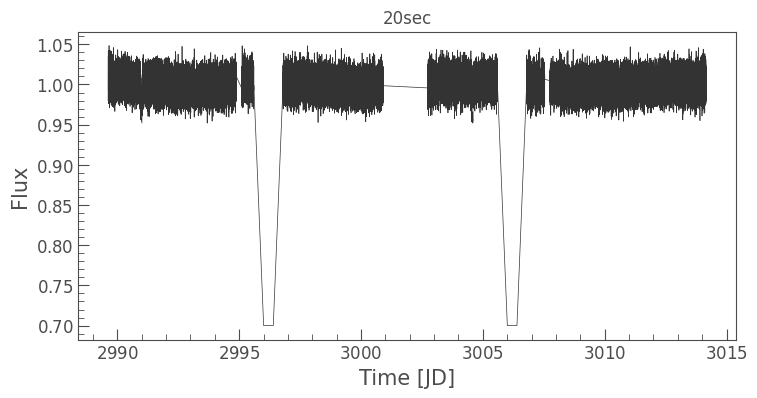

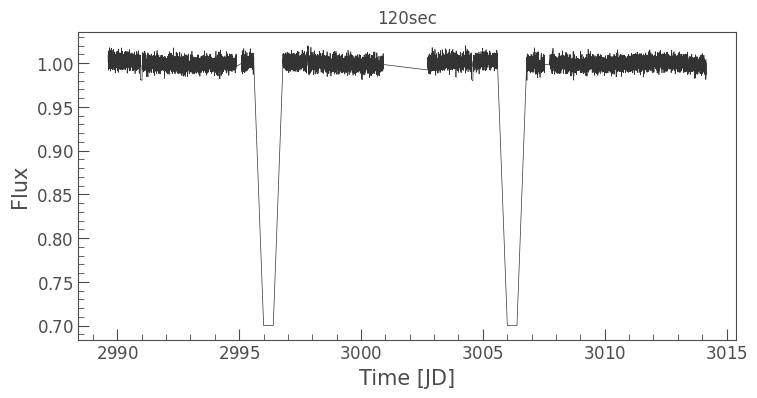

In [15]:
import lightkurve as lk
import numpy as np
%matplotlib inline
toi = 573
tic = 296780789
search_result1 = lk.search_lightcurve('TIC'+str(tic), mission='TESS', exptime=20)
search_result2 = lk.search_lightcurve('TIC'+str(tic), mission='TESS', exptime=120)



lc_collection1 = search_result1[0].download()
lc_collection2 = search_result2[2].download()


lc1 = lc_collection1.normalize().remove_outliers(sigma_upper=4, sigma_lower=4)
lc3 = lc_collection2.normalize().remove_outliers(sigma_upper=4, sigma_lower=4)

data = lc1.to_table()
data2 = lc3.to_table()


lc1_time = data['time']
lc1_flux =[]

lc3_time = data2['time']
lc3_flux = []

for x in lc1_time:
    if 2996<x.value<2996.4 or 3006<x.value<3006.4:
        lc1_flux.append(0.7)
    elif 2995.6<x.value<=2996:
        lc1_flux.append(    (2996-x.value)/(2996-2995.6)*(1-0.7)+0.7           )
    elif 3005.6<x.value<=3006:
        lc1_flux.append(    (3006-x.value)/(3006-3005.6)*(1-0.7)+0.7           )
    elif 2996.4<=x.value<2996.8:
        lc1_flux.append(    (x.value-2996.4)/(2996.8-2996.4)*(1-0.7)+0.7           )
    elif 3006.4<=x.value<3006.8:
        lc1_flux.append(    (x.value-3006.4)/(3006.8-3006.4)*(1-0.7)+0.7           )
    else:
        lc1_flux.append(1)


for x in lc3_time:
    if 2996<x.value<2996.4 or 3006<x.value<3006.4:
        lc3_flux.append(0.7)
    elif 2995.6<x.value<=2996:
        lc3_flux.append(    (2996-x.value)/(2996-2995.6)*(1-0.7)+0.7           )
    elif 3005.6<x.value<=3006:
        lc3_flux.append(    (3006-x.value)/(3006-3005.6)*(1-0.7)+0.7           )
    elif 2996.4<=x.value<2996.8:
        lc3_flux.append(    (x.value-2996.4)/(2996.8-2996.4)*(1-0.7)+0.7           )
    elif 3006.4<=x.value<3006.8:
        lc3_flux.append(    (x.value-3006.4)/(3006.8-3006.4)*(1-0.7)+0.7           )
    else:
        lc3_flux.append(1)


data20 = lc1.to_pandas()
data20 = data20.reset_index()

data120 = lc3.to_pandas()
data120 = data120.reset_index()


data20['transit'] = lc1_flux
data20 = data20[['time','flux','transit']]

data120['transit'] = lc3_flux
data120 = data120[['time','flux','transit']]

for index,row in data20.iterrows():
    value = row['flux']
    if 2995.6<row.loc['time']<2996.8 or 3005.6<row.loc['time']<3006.8:
        value = row['transit']
    data20.at[index,'flux'] = value
    
for index,row in data120.iterrows():
    value = row['flux']
    if 2995.6<row.loc['time']<2996.8 or 3005.6<row.loc['time']<3006.8:
        value = row['transit']
    data120.at[index,'flux'] = value

lc1_time = data20['time']
lc1_flux = data20['flux']

lc3_time = data120['time']
lc3_flux = data120['flux']

lc2 = lk.LightCurve(time=lc1_time, flux=lc1_flux)
lc4 = lk.LightCurve(time=lc3_time,flux=lc3_flux)

lc2.plot().set_title('20sec');
lc4.plot().set_title('120sec')






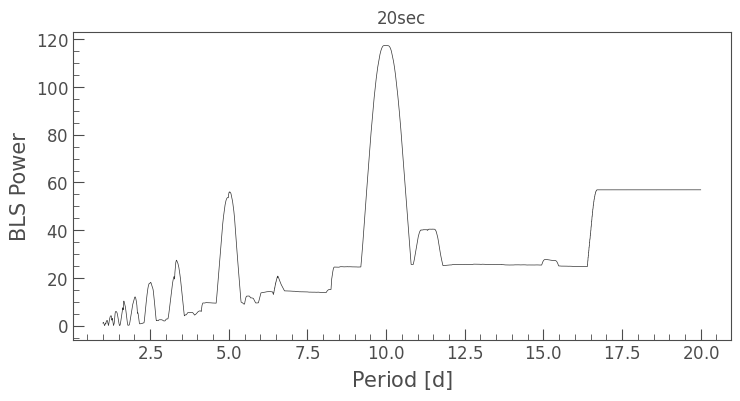

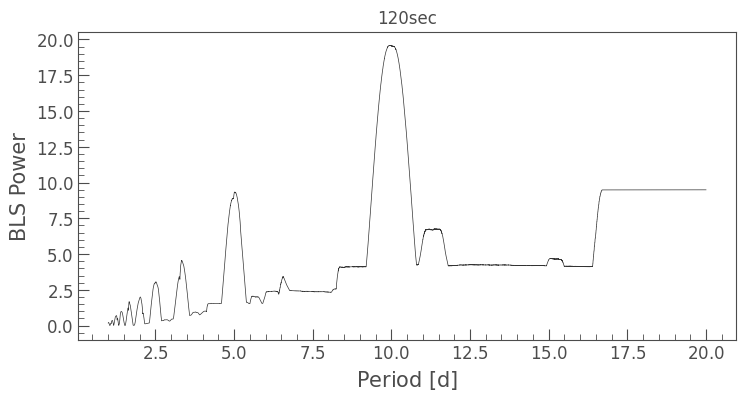

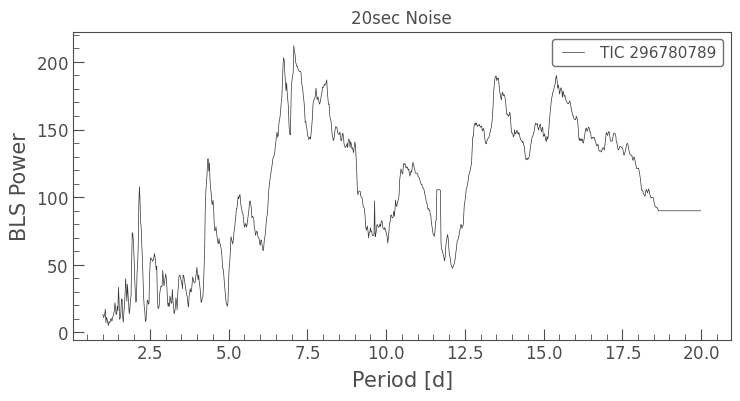

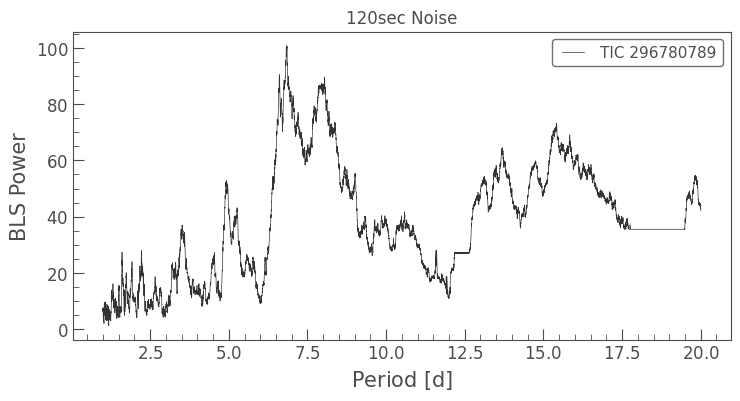

In [17]:
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls1 = lc2.to_periodogram(method='bls', period=period, frequency_factor=500);
bls1.plot().set_title("20sec");

bls2 = lc4.to_periodogram(method='bls', period=period, frequency_factor=500);
bls2.plot().set_title("120sec");

bls3 = lc1.to_periodogram(method='bls', period=period, frequency_factor=500);
bls3.plot().set_title("20sec Noise");

bls4 = lc3.to_periodogram(method='bls', period=period, frequency_factor=500);
bls4.plot().set_title("120sec Noise");

In [29]:
max_power20 = bls1.max_power
max_power120 = bls2.max_power

powers20 = (bls3.power)/bls3.max_power * bls1.max_power
powers120 = (bls4.power)/bls4.max_power * bls2.max_power

noise20 = np.mean(powers20)
noise120 = np.mean(powers120)

sn1 = max_power20/noise20
sn2 = max_power120/noise120
print(sn1,sn2)
print(noise20,noise120)

1.9931349888660468 2.6176980864963513
58.86976530475432 7.476389847486562
